# Lab 6.01 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv', index_col=0)
# Show the first few records of the Data Frame
df.head()

,Sex,Hwt,Bwt
ID,,,
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


2. Draw a scatter plot of both variables.


<Axes: xlabel='Hwt', ylabel='Bwt'>

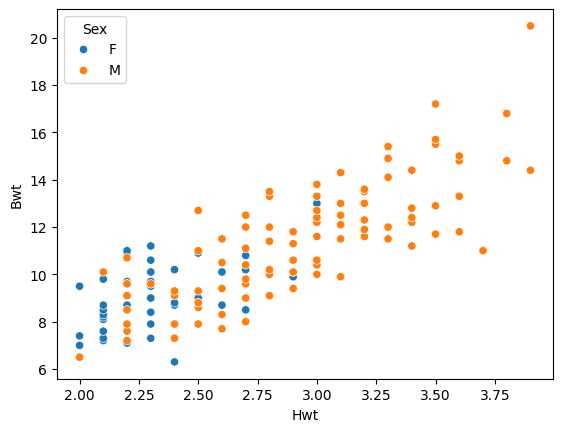

In [26]:
sns.scatterplot(data=df, x='Hwt', y='Bwt', hue=df.Sex)

3. Calculate and draw the regression line.


In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Hwt'], df['Bwt'])

print(f"Regression equation: Bwt = {intercept:.3f} + {slope:.3f} × Hwt")

Regression equation: Bwt = -0.351 + 4.032 × Hwt


<Axes: xlabel='Hwt', ylabel='Bwt'>

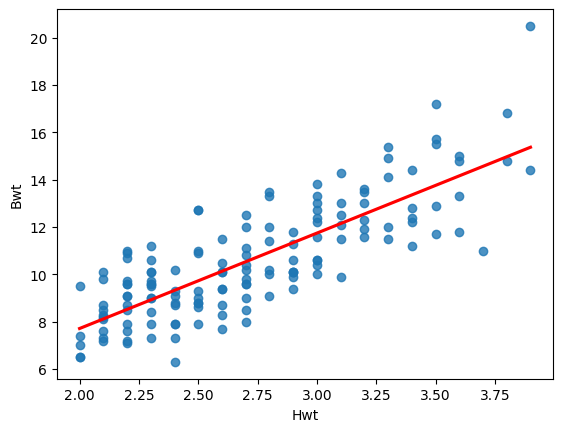

In [25]:
sns.regplot(data=df, x='Hwt', y='Bwt', ci=None, line_kws={"color": "red"})

4. Calculate the correlation coefficient and the coefficient of determination.

In [ ]:
r, p = stats.pearsonr(df['Hwt'], df['Bwt'])

r_squared = r ** 2

print(f"Correlation coefficient (r): {r:.4f}")
print(f"Coefficient of determination (R²): {r_squared:.4f}")

Correlation coefficient (r): 0.8041
Coefficient of determination (R²): 0.6466


5. Interpret the results from the previous steps.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


2. Draw a scatter plot of both variables for each gender.


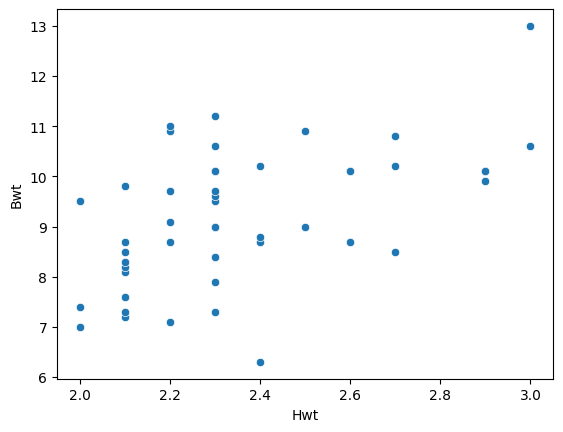

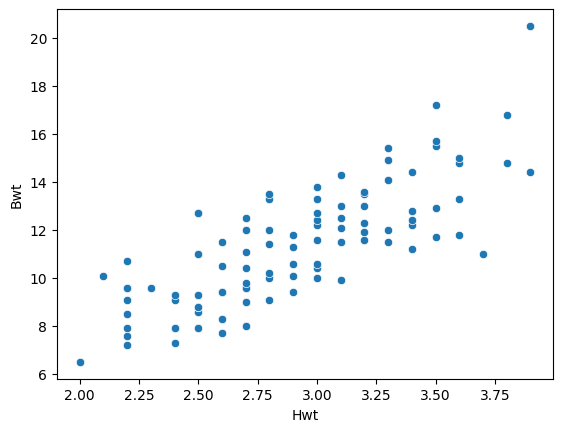

In [32]:
sns.scatterplot(data=df.loc[df['Sex'] == 'F'], x='Hwt', y='Bwt');plt.show()
sns.scatterplot(data=df.loc[df['Sex'] == 'M'], x='Hwt', y='Bwt');plt.show()

3. Calculate and draw the regression line.


Regression equation: Bwt = -1.177 + 4.310 × Hwt


<Axes: xlabel='Hwt', ylabel='Bwt'>

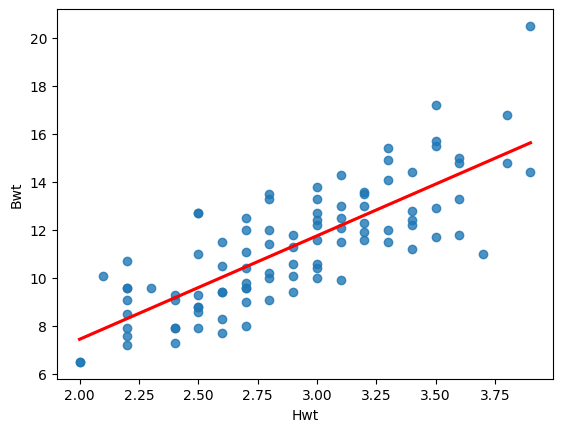

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[df['Sex'] == 'M']['Hwt'], df.loc[df['Sex'] == 'M']['Bwt'])

print(f"Regression equation: Bwt = {intercept:.3f} + {slope:.3f} × Hwt")
sns.regplot(data=df.loc[df['Sex'] == 'M'], x='Hwt', y='Bwt', ci=None, line_kws={"color": "red"})

Regression equation: Bwt = 2.981 + 2.636 × Hwt


<Axes: xlabel='Hwt', ylabel='Bwt'>

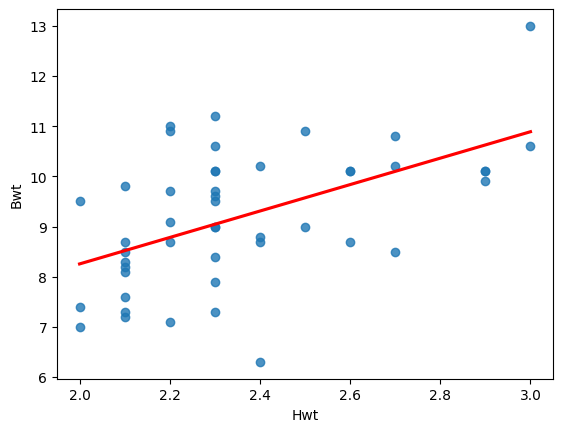

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[df['Sex'] == 'F']['Hwt'], df.loc[df['Sex'] == 'F']['Bwt'])

print(f"Regression equation: Bwt = {intercept:.3f} + {slope:.3f} × Hwt")
sns.regplot(data=df.loc[df['Sex'] == 'F'], x='Hwt', y='Bwt', ci=None, line_kws={"color": "red"})

4. Calculate the correlation coefficient and the coefficient of determination.


In [39]:
r, p = stats.pearsonr(df.loc[df['Sex'] == 'M']['Hwt'], df.loc[df['Sex'] == 'M']['Bwt'])
r_squared = r ** 2
print(f"Correlation coefficient (r): {r:.4f}")
print(f"Coefficient of determination (R²): {r_squared:.4f}")

Correlation coefficient (r): 0.7930
Coefficient of determination (R²): 0.6289


In [40]:
r, p = stats.pearsonr(df.loc[df['Sex'] == 'F']['Hwt'], df.loc[df['Sex'] == 'F']['Bwt'])
r_squared = r ** 2
print(f"Correlation coefficient (r): {r:.4f}")
print(f"Coefficient of determination (R²): {r_squared:.4f}")

Correlation coefficient (r): 0.5320
Coefficient of determination (R²): 0.2831


5. Interpret the results from the previous steps.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
